In [262]:
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from tabulate import tabulate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_excel('PRODUCT_SURVEY RESULTS_2023.xlsx', index_col = None)

In [3]:
df.set_index('No.', inplace = True)

### General Overview of data

In [4]:
df.head()

,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,Unnamed: 12
No.,,,,,,,,,,,,
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,NaN
2,51-60,Female,Own a car,Married with children,Price;Brand name;Functionality,Very likely,Grilles,Centre compartment;Dashboard;Sun blocker for f...,under 500,Only with professional help,over 1000,NaN
3,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Functionality;Size,Very likely,NaN,Steering wheel;Centre compartment;Door handles...,0,Only with professional help,0,NaN
4,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,NaN,Steering wheel;Centre compartment;Dashboard,under 500,No,under 500,NaN
5,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Aesthetics;Technological features;Functi...,Likely,Wheels,Centre compartment;Dashboard,under 500,Only with professional help,500-1000,NaN


In [5]:
df.shape

(50, 12)

In [6]:
df.columns

Index(['Which age group do you belong to?', 'What is your gender?',
       'Which category do you currently belong to?',
       'Which of the following best describes you?',
       'Which of these factors are important to you when deciding which car to purchase?',
       'How likely are you to opt for customised vehicle if there were no extra charges? ',
       'Which of the following exterior components would you choose to customise (texture, layout, size, etc)? ',
       'Which of the following interior components would you choose to customise (texture, layout, size, etc)? ',
       'How much are you willing to spend on car customisation if surcharges are applicable?',
       'Are you interested in designing your own components to personalise your car? ',
       'How much are you willing to pay for the personalised design? ',
       'Unnamed: 12'],
      dtype='object')

### Renaming col_names for readability

In [7]:
col_names = list(df.columns)

new_col_names = [
    'age_group',
    'gender',
    'car_ownership_history',
    'marital_status',
    'car_purchase_factors',
    'customize_vehicle_likelihood_no_extra_charge',
    'desired_exterior_component_customization',
    'desired_interior_component_customization',
    'customization_surcharge_tolerance',
    'design_own_component_likelihood',
    'personalized_design_surcharge_tolerance',
    'require_designer'
]

dict_to_rename = dict()

for idx, col_name in enumerate(col_names):
    dict_to_rename[col_name] = new_col_names[idx]

renamed_df = df.rename(dict_to_rename, axis = 1)

In [8]:
renamed_df.dtypes

age_group                                       object
gender                                          object
car_ownership_history                           object
marital_status                                  object
car_purchase_factors                            object
customize_vehicle_likelihood_no_extra_charge    object
desired_exterior_component_customization        object
desired_interior_component_customization        object
customization_surcharge_tolerance               object
design_own_component_likelihood                 object
personalized_design_surcharge_tolerance         object
require_designer                                object
dtype: object

In [9]:
renamed_df.head()

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,NaN
2,51-60,Female,Own a car,Married with children,Price;Brand name;Functionality,Very likely,Grilles,Centre compartment;Dashboard;Sun blocker for f...,under 500,Only with professional help,over 1000,NaN
3,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Functionality;Size,Very likely,NaN,Steering wheel;Centre compartment;Door handles...,0,Only with professional help,0,NaN
4,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,NaN,Steering wheel;Centre compartment;Dashboard,under 500,No,under 500,NaN
5,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Aesthetics;Technological features;Functi...,Likely,Wheels,Centre compartment;Dashboard,under 500,Only with professional help,500-1000,NaN


### Check for Null Data
* 3 features with null data
    * car_purchase_factors
    * desired_exterior_component
    * require_designer

In [10]:
print("Features", "                                    Null Values")
renamed_df.isnull().sum()

Features                                     Null Values


age_group                                        0
gender                                           0
car_ownership_history                            0
marital_status                                   0
car_purchase_factors                             1
customize_vehicle_likelihood_no_extra_charge     0
desired_exterior_component_customization         2
desired_interior_component_customization         0
customization_surcharge_tolerance                0
design_own_component_likelihood                  0
personalized_design_surcharge_tolerance          0
require_designer                                15
dtype: int64

In [11]:
print('features', 'unique_values'.rjust(50,' '))
print('-'*60)
print(renamed_df.apply(lambda col: len(col.unique())))

features                                      unique_values
------------------------------------------------------------
age_group                                        4
gender                                           2
car_ownership_history                            3
marital_status                                   3
car_purchase_factors                            37
customize_vehicle_likelihood_no_extra_charge     3
desired_exterior_component_customization        23
desired_interior_component_customization        16
customization_surcharge_tolerance                4
design_own_component_likelihood                  3
personalized_design_surcharge_tolerance          4
require_designer                                 3
dtype: int64


### Handling car_purchase_factors Null value
* 37 unique values actually arrays of different permutations

In [12]:
renamed_df['car_purchase_factors'].unique()

array(['Price;Technological features;Functionality',
       'Price;Brand name;Functionality',
       'Price;Brand name;Aesthetics;Functionality;Size',
       'Price;Brand name;Aesthetics;Technological features;Functionality;Size;Sustainability/environment considerations',
       'Price;Aesthetics;Technological features;Functionality',
       'Price;Brand name;Aesthetics;Functionality',
       'Price;Brand name;Aesthetics;Technological features;Functionality;Size;Customisable options;Sustainability/environment considerations',
       'Price;Functionality;Size;Sustainability/environment considerations',
       'Price',
       'Price;Brand name;Technological features;Functionality;Size;Sustainability/environment considerations',
       'Price;Brand name;Technological features;Functionality;Size;Customisable options;Sustainability/environment considerations',
       'Price;Functionality;Size',
       'Price;Aesthetics;Technological features;Functionality;Customisable options;Sustainability

In [13]:
renamed_df[renamed_df['car_purchase_factors'].isna()]

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
18,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,NaN,Very likely,Wheels,Dashboard,over 1000,Only with professional help,over 1000,"Yes, I can design on my own"


##### Only 1 entry missing for car_purchase_factor column
* age_group : 20-30
* gender : Male
* marital_status : single
* car_ownership_history : never own car but planning to purchase

In [14]:
# Extracting row entries with similar characteristics as null value entry male
male_youths = renamed_df[(renamed_df['age_group'] == '20-30') & (renamed_df['gender'] == 'Male') & (renamed_df['marital_status'] == 'Single') & (renamed_df['car_ownership_history'] == 'Do not own a car, but planning to purchase in future')].dropna()
male_youths.rename(dict_to_rename, inplace = True)
male_youths

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
22,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels;Grilles;Headlights;Side mirrors;Bumpers,Steering wheel;Door handles;Dashboard,500-1000,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
23,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights,Dashboard,over 1000,Yes,over 1000,"Yes, I can design on my own"
25,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Not likely,Wheels;Headlights,Dashboard,500-1000,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
27,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Brand name;Technological features;Functionalit...,Very likely,Wheels,Steering wheel;Centre compartment;Door handles...,over 1000,Only with professional help,over 1000,"Yes, I can design on my own"
28,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Aesthetics;Technological features;Functi...,Very likely,Wheels;Headlights;Bumpers,Steering wheel;Centre compartment;Door handles...,500-1000,Only with professional help,500-1000,"Yes, I can design on my own"
31,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights,Steering wheel,500-1000,No,500-1000,"Yes, I can design on my own"
32,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels;Headlights;Bumpers,Steering wheel;Centre compartment;Dashboard,500-1000,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
34,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality;Sus...,Likely,Grilles;Headlights;Bumpers,Centre compartment;Dashboard,under 500,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
35,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Functionality,Very likely,Wheels;Bumpers,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own"


In [15]:
len(male_youths)

15

In [16]:
male_youths_purchase_factors = list()
male_youths_num_factors = list()

for row in male_youths['car_purchase_factors'].unique(): # For each array of factors of each male
    male_youths_num_factors.append(len(row.split(';'))) # Extract number of factors of each male
    for factor in row.split(';'):
        male_youths_purchase_factors.append(factor)

print("Factors | Count")
for i in Counter(male_youths_num_factors).most_common():
    print(str(i[0]).center(7), '|' ,str(i[1]).rjust(3))
    
print()
for i in Counter(male_youths_purchase_factors).most_common():
    print(i[0] , ':', i[1])

Factors | Count
   4    |   4
   5    |   3
   6    |   2
   3    |   2
   8    |   1
   1    |   1
   2    |   1

Price : 12
Technological features : 11
Brand name : 9
Functionality : 9
Aesthetics : 6
Size : 5
Sustainability/environment considerations : 5
Customisable options : 3


* Most male (age 20-30) (single) have 4 purchase_factors
* Price, Technological features, Brand name & functionality emerge as top 4

In [17]:
# Replace null value with top 4 purchase factors 
renamed_df.at[18,'car_purchase_factors'] = 'Price;Technological features;Brand name;Functionality'

In [18]:
renamed_df.isnull().sum()

age_group                                        0
gender                                           0
car_ownership_history                            0
marital_status                                   0
car_purchase_factors                             0
customize_vehicle_likelihood_no_extra_charge     0
desired_exterior_component_customization         2
desired_interior_component_customization         0
customization_surcharge_tolerance                0
design_own_component_likelihood                  0
personalized_design_surcharge_tolerance          0
require_designer                                15
dtype: int64

### Handling desired__exterior_component_customization Null values

In [19]:
renamed_df['desired_exterior_component_customization'].unique()

array(['Wheels;Grilles', 'Grilles', nan, 'Wheels',
       'Wheels;Side mirrors;Bumpers', 'Side mirrors;Bumpers',
       'Wheels;Headlights;Side mirrors;Bumpers', 'Bumpers',
       'Grilles;Bumpers', 'Grilles;Side mirrors;Bumpers',
       'Wheels;Side mirrors', 'Wheels;Headlights;Side mirrors',
       'Grilles;Headlights;Side mirrors', 'Wheels;Headlights',
       'Wheels;Grilles;Headlights;Side mirrors;Bumpers',
       'Wheels;Grilles;Headlights', 'Wheels;Headlights;Bumpers',
       'Headlights;Side mirrors',
       'Grilles;Headlights;Side mirrors;Bumpers',
       'Grilles;Headlights;Bumpers', 'Wheels;Bumpers',
       'Wheels;Grilles;Side mirrors;Bumpers',
       'Wheels;Headlights;Bumpers;add body kit and change the exhaust and tune the engine'],
      dtype=object)

In [20]:
renamed_df[renamed_df['desired_exterior_component_customization'].isna()]

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
3,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Functionality;Size,Very likely,NaN,Steering wheel;Centre compartment;Door handles...,0,Only with professional help,0,NaN
4,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,NaN,Steering wheel;Centre compartment;Dashboard,under 500,No,under 500,NaN


Since both null data entries owned a car before, it is highly likely that NaN represents that owner does not want to customize the exterior of their car.

In [21]:
renamed_df.at[3,'desired_exterior_component_customization'] = 'Not customizing'
renamed_df.at[4,'desired_exterior_component_customization'] = 'Not customizing'

In [22]:
renamed_df.isnull().sum()

age_group                                        0
gender                                           0
car_ownership_history                            0
marital_status                                   0
car_purchase_factors                             0
customize_vehicle_likelihood_no_extra_charge     0
desired_exterior_component_customization         0
desired_interior_component_customization         0
customization_surcharge_tolerance                0
design_own_component_likelihood                  0
personalized_design_surcharge_tolerance          0
require_designer                                15
dtype: int64

### Handling require_designer Null values

In [23]:
renamed_df['require_designer'].unique()

array([nan, 'No, I would need a designer to model my sketch',
       'Yes, I can design on my own'], dtype=object)

In [24]:
renamed_df[renamed_df['require_designer'].isna()]

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,NaN
2,51-60,Female,Own a car,Married with children,Price;Brand name;Functionality,Very likely,Grilles,Centre compartment;Dashboard;Sun blocker for f...,under 500,Only with professional help,over 1000,NaN
3,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Functionality;Size,Very likely,Not customizing,Steering wheel;Centre compartment;Door handles...,0,Only with professional help,0,NaN
4,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Not customizing,Steering wheel;Centre compartment;Dashboard,under 500,No,under 500,NaN
5,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Aesthetics;Technological features;Functi...,Likely,Wheels,Centre compartment;Dashboard,under 500,Only with professional help,500-1000,NaN
6,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Functionality,Very likely,Wheels;Side mirrors;Bumpers,Steering wheel;Centre compartment;Door handles...,under 500,Yes,under 500,NaN
7,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Side mirrors;Bumpers,Door handles;Dashboard,under 500,Only with professional help,under 500,NaN
8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Sustainability/enviro...,Very likely,Wheels;Headlights;Side mirrors;Bumpers,Centre compartment;Door handles;Dashboard,under 500,Only with professional help,over 1000,NaN
9,31-40,Male,Own more than one car,Married with children,Price,Not likely,Bumpers,Dashboard,0,No,over 1000,NaN


##### 9 customers have info that can be extracted from another column
* i.e set require_designer = Yes 
* Because they indicated under "design_own_component_likelihood" that they will do it "Only with professional help"

In [25]:
require_professional_df = renamed_df[(renamed_df['require_designer'].isna()) & (renamed_df['design_own_component_likelihood'] == 'Only with professional help')]
require_professional_df # to extract indexes of customers

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
2,51-60,Female,Own a car,Married with children,Price;Brand name;Functionality,Very likely,Grilles,Centre compartment;Dashboard;Sun blocker for f...,under 500,Only with professional help,over 1000,NaN
3,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Functionality;Size,Very likely,Not customizing,Steering wheel;Centre compartment;Door handles...,0,Only with professional help,0,NaN
5,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Aesthetics;Technological features;Functi...,Likely,Wheels,Centre compartment;Dashboard,under 500,Only with professional help,500-1000,NaN
7,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Side mirrors;Bumpers,Door handles;Dashboard,under 500,Only with professional help,under 500,NaN
8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Sustainability/enviro...,Very likely,Wheels;Headlights;Side mirrors;Bumpers,Centre compartment;Door handles;Dashboard,under 500,Only with professional help,over 1000,NaN
10,51-60,Male,Own a car,Married with children,Price;Brand name;Technological features;Functi...,Very likely,Grilles;Bumpers,Steering wheel;Centre compartment;Dashboard,under 500,Only with professional help,under 500,NaN
11,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Technological features;Functi...,Very likely,Grilles;Side mirrors;Bumpers,Steering wheel;Centre compartment;Door handles...,0,Only with professional help,0,NaN
13,20-30,Female,Own a car,Single,Price;Aesthetics;Technological features;Functi...,Very likely,Grilles,Steering wheel;Centre compartment;Door handles...,under 500,Only with professional help,under 500,NaN
15,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Size,Very likely,Wheels;Headlights;Side mirrors,Steering wheel;Centre compartment;Dashboard,under 500,Only with professional help,0,NaN


In [26]:
no_need_designer = renamed_df['require_designer'].unique()[2]
need_designer = renamed_df['require_designer'].unique()[1]

print(no_need_designer)
print(need_designer)

Yes, I can design on my own
No, I would need a designer to model my sketch


In [27]:
for idx in list(require_professional_df.index):
    renamed_df.at[idx,'require_designer'] = need_designer

In [28]:
renamed_df[renamed_df['require_designer'].isna()]

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,NaN
4,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Not customizing,Steering wheel;Centre compartment;Dashboard,under 500,No,under 500,NaN
6,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Functionality,Very likely,Wheels;Side mirrors;Bumpers,Steering wheel;Centre compartment;Door handles...,under 500,Yes,under 500,NaN
9,31-40,Male,Own more than one car,Married with children,Price,Not likely,Bumpers,Dashboard,0,No,over 1000,NaN
12,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size,Likely,Wheels;Side mirrors,Steering wheel;Door handles;Dashboard,under 500,No,under 500,NaN
14,41-50,Male,Own a car,Single,Price,Very likely,Wheels,Steering wheel,under 500,Yes,under 500,NaN


* 4 out of 6 remaining Null value customers indicated that they will not be designing own component
* Therefore, set require_designer = No

In [29]:
Not_Designing_df = renamed_df[(renamed_df['require_designer'].isna()) & (renamed_df['design_own_component_likelihood'] == 'No')]
Not_Designing_df

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,NaN
4,20-30,Male,Own a car,Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Not customizing,Steering wheel;Centre compartment;Dashboard,under 500,No,under 500,NaN
9,31-40,Male,Own more than one car,Married with children,Price,Not likely,Bumpers,Dashboard,0,No,over 1000,NaN
12,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size,Likely,Wheels;Side mirrors,Steering wheel;Door handles;Dashboard,under 500,No,under 500,NaN


In [30]:
for idx in list(Not_Designing_df.index):
    renamed_df.at[idx,'require_designer'] = 'Not Designing' # 0 represents not designing in encoding

In [31]:
renamed_df[renamed_df['require_designer'].isna()]

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
6,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Functionality,Very likely,Wheels;Side mirrors;Bumpers,Steering wheel;Centre compartment;Door handles...,under 500,Yes,under 500,NaN
14,41-50,Male,Own a car,Single,Price,Very likely,Wheels,Steering wheel,under 500,Yes,under 500,NaN


##### Assume the last 2 customer with NaN require_designer to mean that they do not require personal designer

In [32]:
renamed_df.at[6,'require_designer'] = no_need_designer
renamed_df.at[14,'require_designer'] = no_need_designer

In [33]:
renamed_df.isnull().sum()

age_group                                       0
gender                                          0
car_ownership_history                           0
marital_status                                  0
car_purchase_factors                            0
customize_vehicle_likelihood_no_extra_charge    0
desired_exterior_component_customization        0
desired_interior_component_customization        0
customization_surcharge_tolerance               0
design_own_component_likelihood                 0
personalized_design_surcharge_tolerance         0
require_designer                                0
dtype: int64

### Data Analysis

In [34]:
sb.set_style('darkgrid')

In [35]:
for col in ['age_group', 'gender', 'car_ownership_history', 'marital_status','customize_vehicle_likelihood_no_extra_charge','customization_surcharge_tolerance','design_own_component_likelihood','personalized_design_surcharge_tolerance','require_designer']:
    renamed_df[col] = renamed_df[col].astype('category')

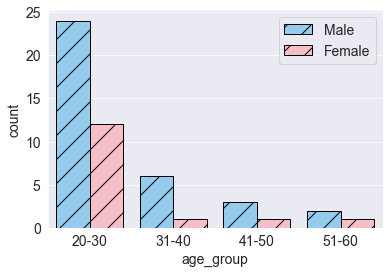

In [36]:
sb.countplot(x = 'age_group', data = renamed_df, order = renamed_df.age_group.cat.categories,
            hue = 'gender', hue_order = ['Male', 'Female'],
            palette = ['lightskyblue', 'lightpink'],
            ec = 'black', hatch = '/');
plt.xlabel("age_group", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

renamed_df.groupby(['age_group'])['gender'].value_counts()
plt.legend(prop={'size': 14})

* Majority of data are in age_group 20-30
* In age_group 20-30, twice as many males than females
* Possible observation: Young Males are more interested in getting a car

age_group                          
20-30      Single                      33
           Married with children        2
           Married with no children     1
31-40      Married with children        3
           Married with no children     2
           Single                       2
41-50      Married with no children     2
           Single                       2
           Married with children        0
51-60      Married with children        3
           Married with no children     0
           Single                       0
Name: marital_status, dtype: int64

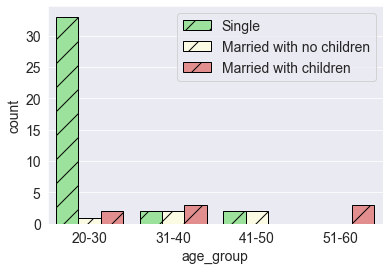

In [37]:
sb.countplot(x = 'age_group', data = renamed_df,
            hue = 'marital_status', hue_order = ['Single', 'Married with no children', 'Married with children'],
            palette = ['lightgreen', 'lightyellow', 'lightcoral'],
            ec = 'black', hatch = '/')
plt.legend(loc = 'upper right',prop={'size': 14});
plt.xlabel("age_group", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

renamed_df.groupby(['age_group'])['marital_status'].value_counts()

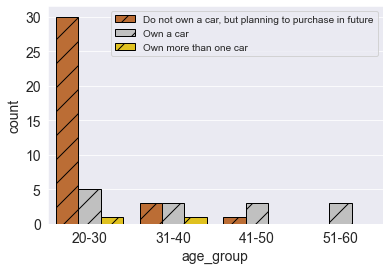

In [38]:
sb.countplot(x = 'age_group', data = renamed_df,
            hue = 'car_ownership_history',
            palette = ['chocolate', 'silver', 'gold'],
            ec = 'black', hatch = '/')
plt.xlabel("age_group", fontsize = 14)
plt.ylabel("count", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.legend(loc = 'upper right');

In [39]:
renamed_df.columns

Index(['age_group', 'gender', 'car_ownership_history', 'marital_status',
       'car_purchase_factors', 'customize_vehicle_likelihood_no_extra_charge',
       'desired_exterior_component_customization',
       'desired_interior_component_customization',
       'customization_surcharge_tolerance', 'design_own_component_likelihood',
       'personalized_design_surcharge_tolerance', 'require_designer'],
      dtype='object')

In [40]:
df_purchase_factors = list()
exterior_components = list()
interior_components = list()

for row in renamed_df['car_purchase_factors'].unique(): # For each array of factors of each male
    for factor in row.split(';'):
        df_purchase_factors.append(factor)
        
for row in renamed_df['desired_exterior_component_customization'].unique(): # For each array of factors of each male
    for factor in row.split(';'):
        exterior_components.append(factor)
        
for row in renamed_df['desired_interior_component_customization'].unique(): # For each array of factors of each male
    for factor in row.split(';'):
        interior_components.append(factor)
    


In [41]:
Counter(df_purchase_factors).values()

dict_values([33, 24, 24, 22, 22, 17, 16, 9])

Text(0, 0.5, 'count')

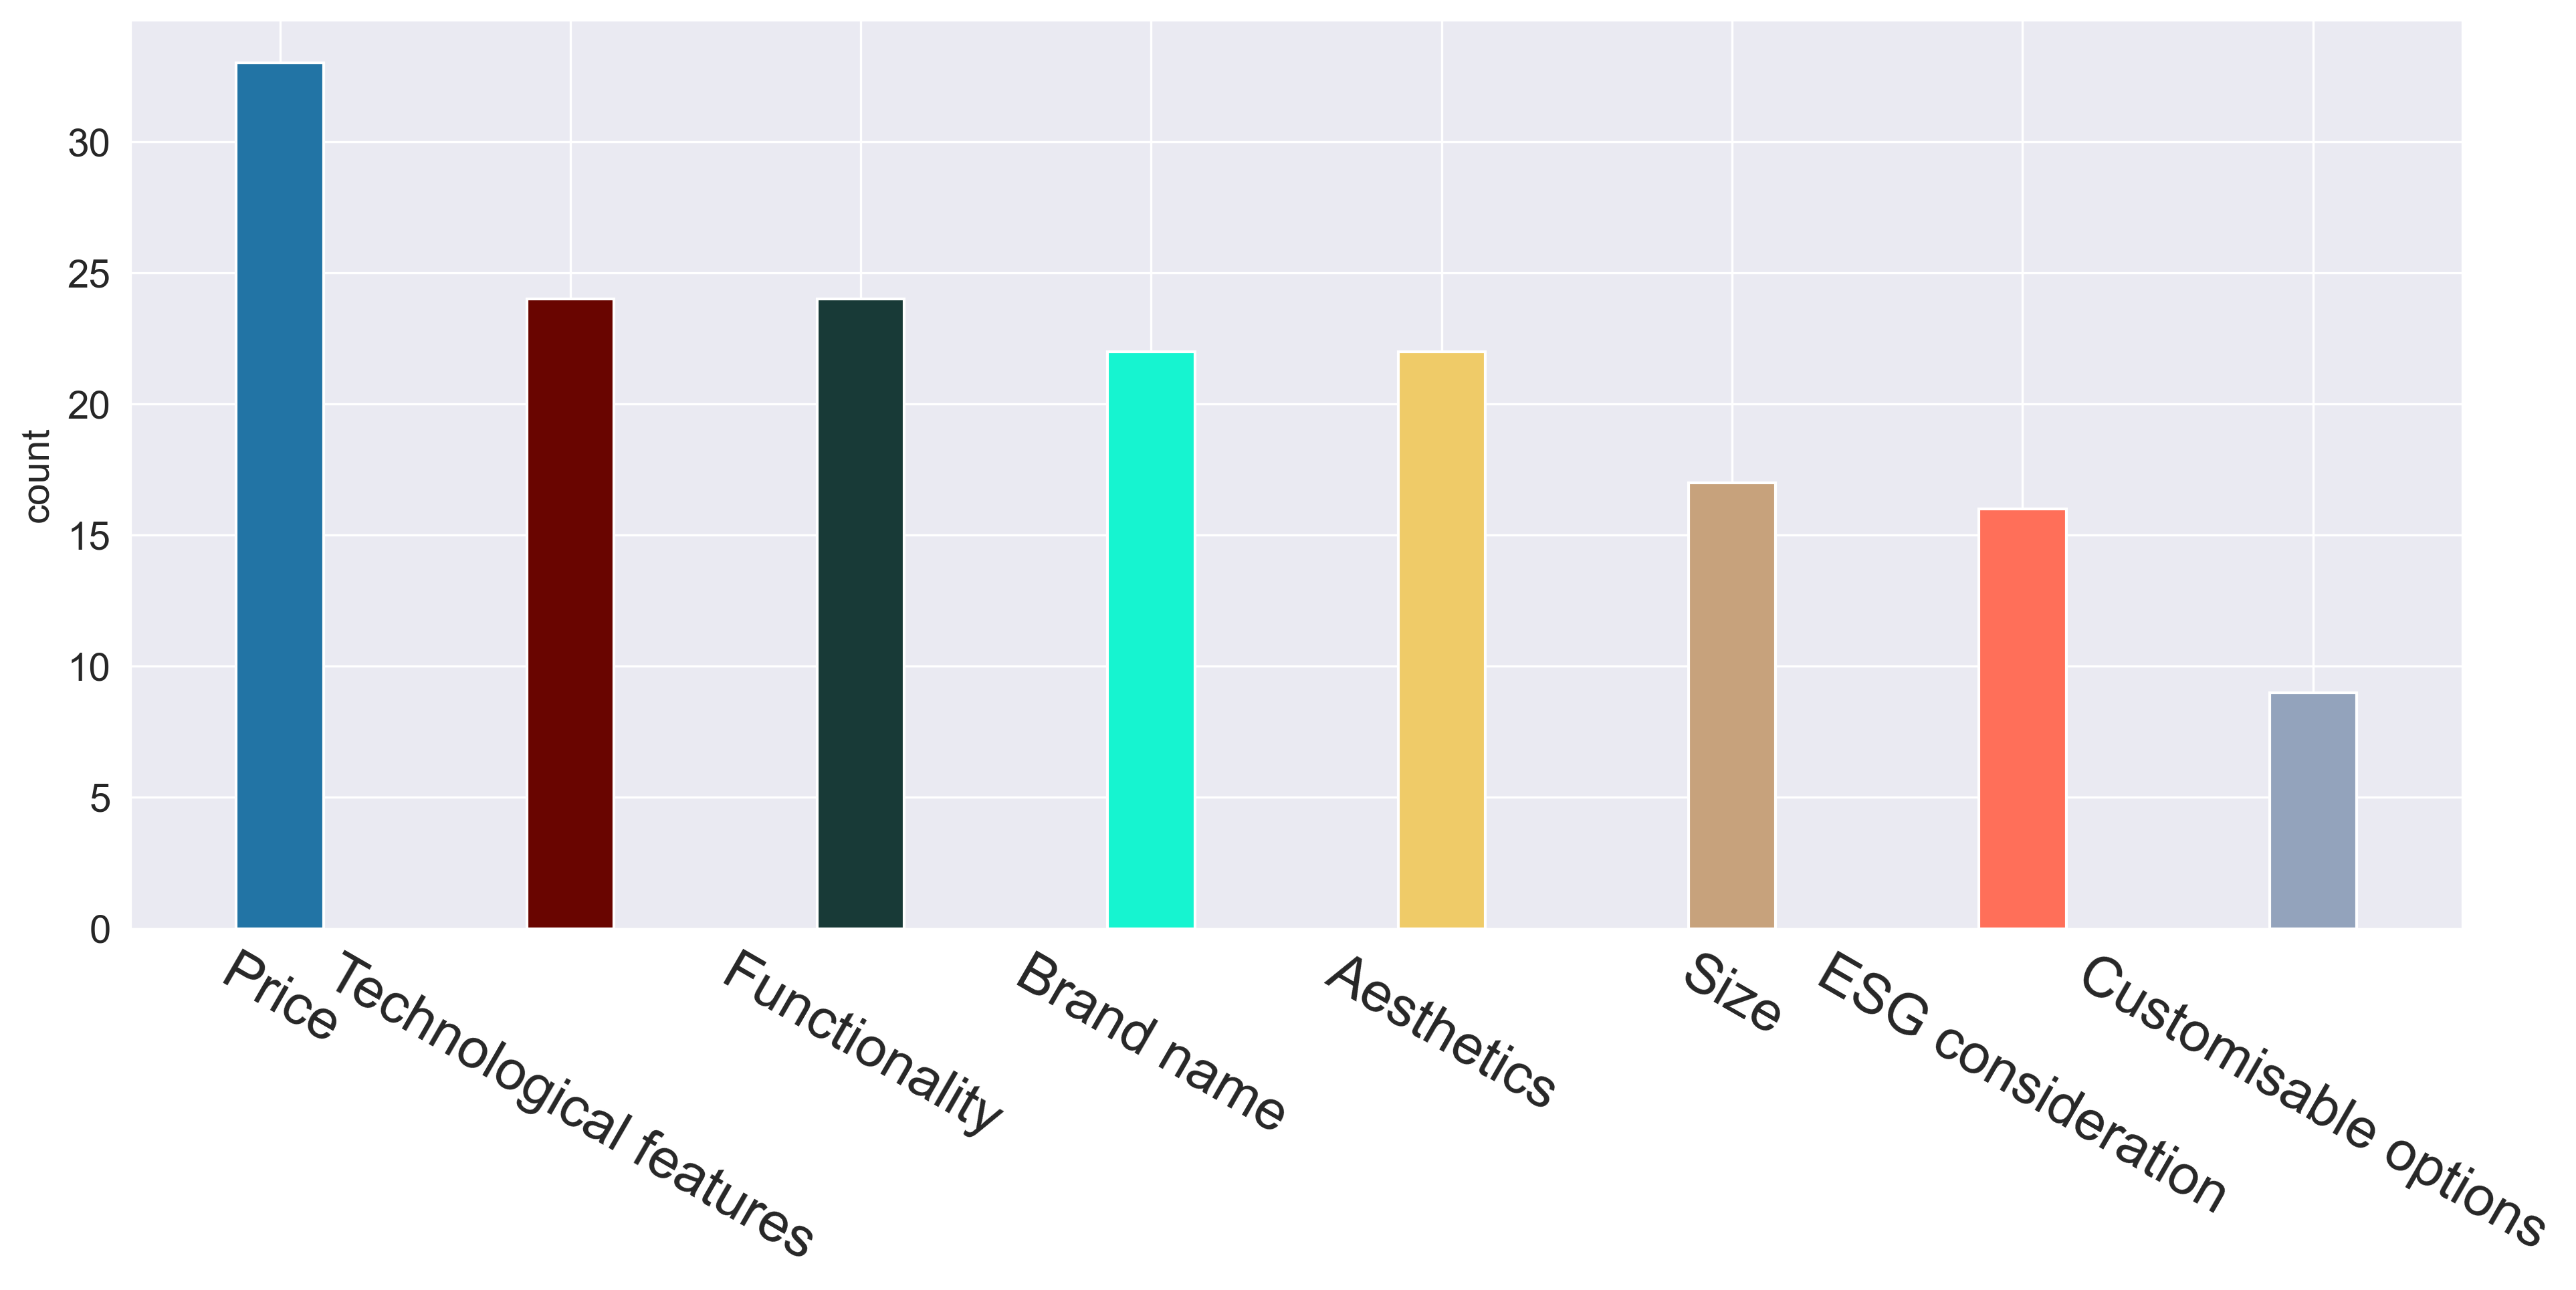

In [42]:
plt.figure(figsize=(15, 6), dpi=300)
purchase_keys = list(Counter(df_purchase_factors).keys())
purchase_values = list(Counter(df_purchase_factors).values())

purchase_keys[-2] = "ESG consideration"

plt.bar(purchase_keys,purchase_values , width = 0.3,
       color = ['#2274a5', '#690500', '#183A37', '#16F4D0', '#EFCB68', '#C7A27C', '#FF6F59', '#93A3BC'])
        
plt.xticks(rotation = -30, fontsize = 20)
plt.yticks(fontsize = 14)
# plt.xlabel("car_purchase_factors", fontsize = 14)
plt.ylabel("count", fontsize = 14)

In [43]:
for i in Counter(exterior_components).most_common():
    print(i[0])

Wheels
Bumpers
Side mirrors
Headlights
Grilles
Not customizing
add body kit and change the exhaust and tune the engine


Text(0, 0.5, 'count')

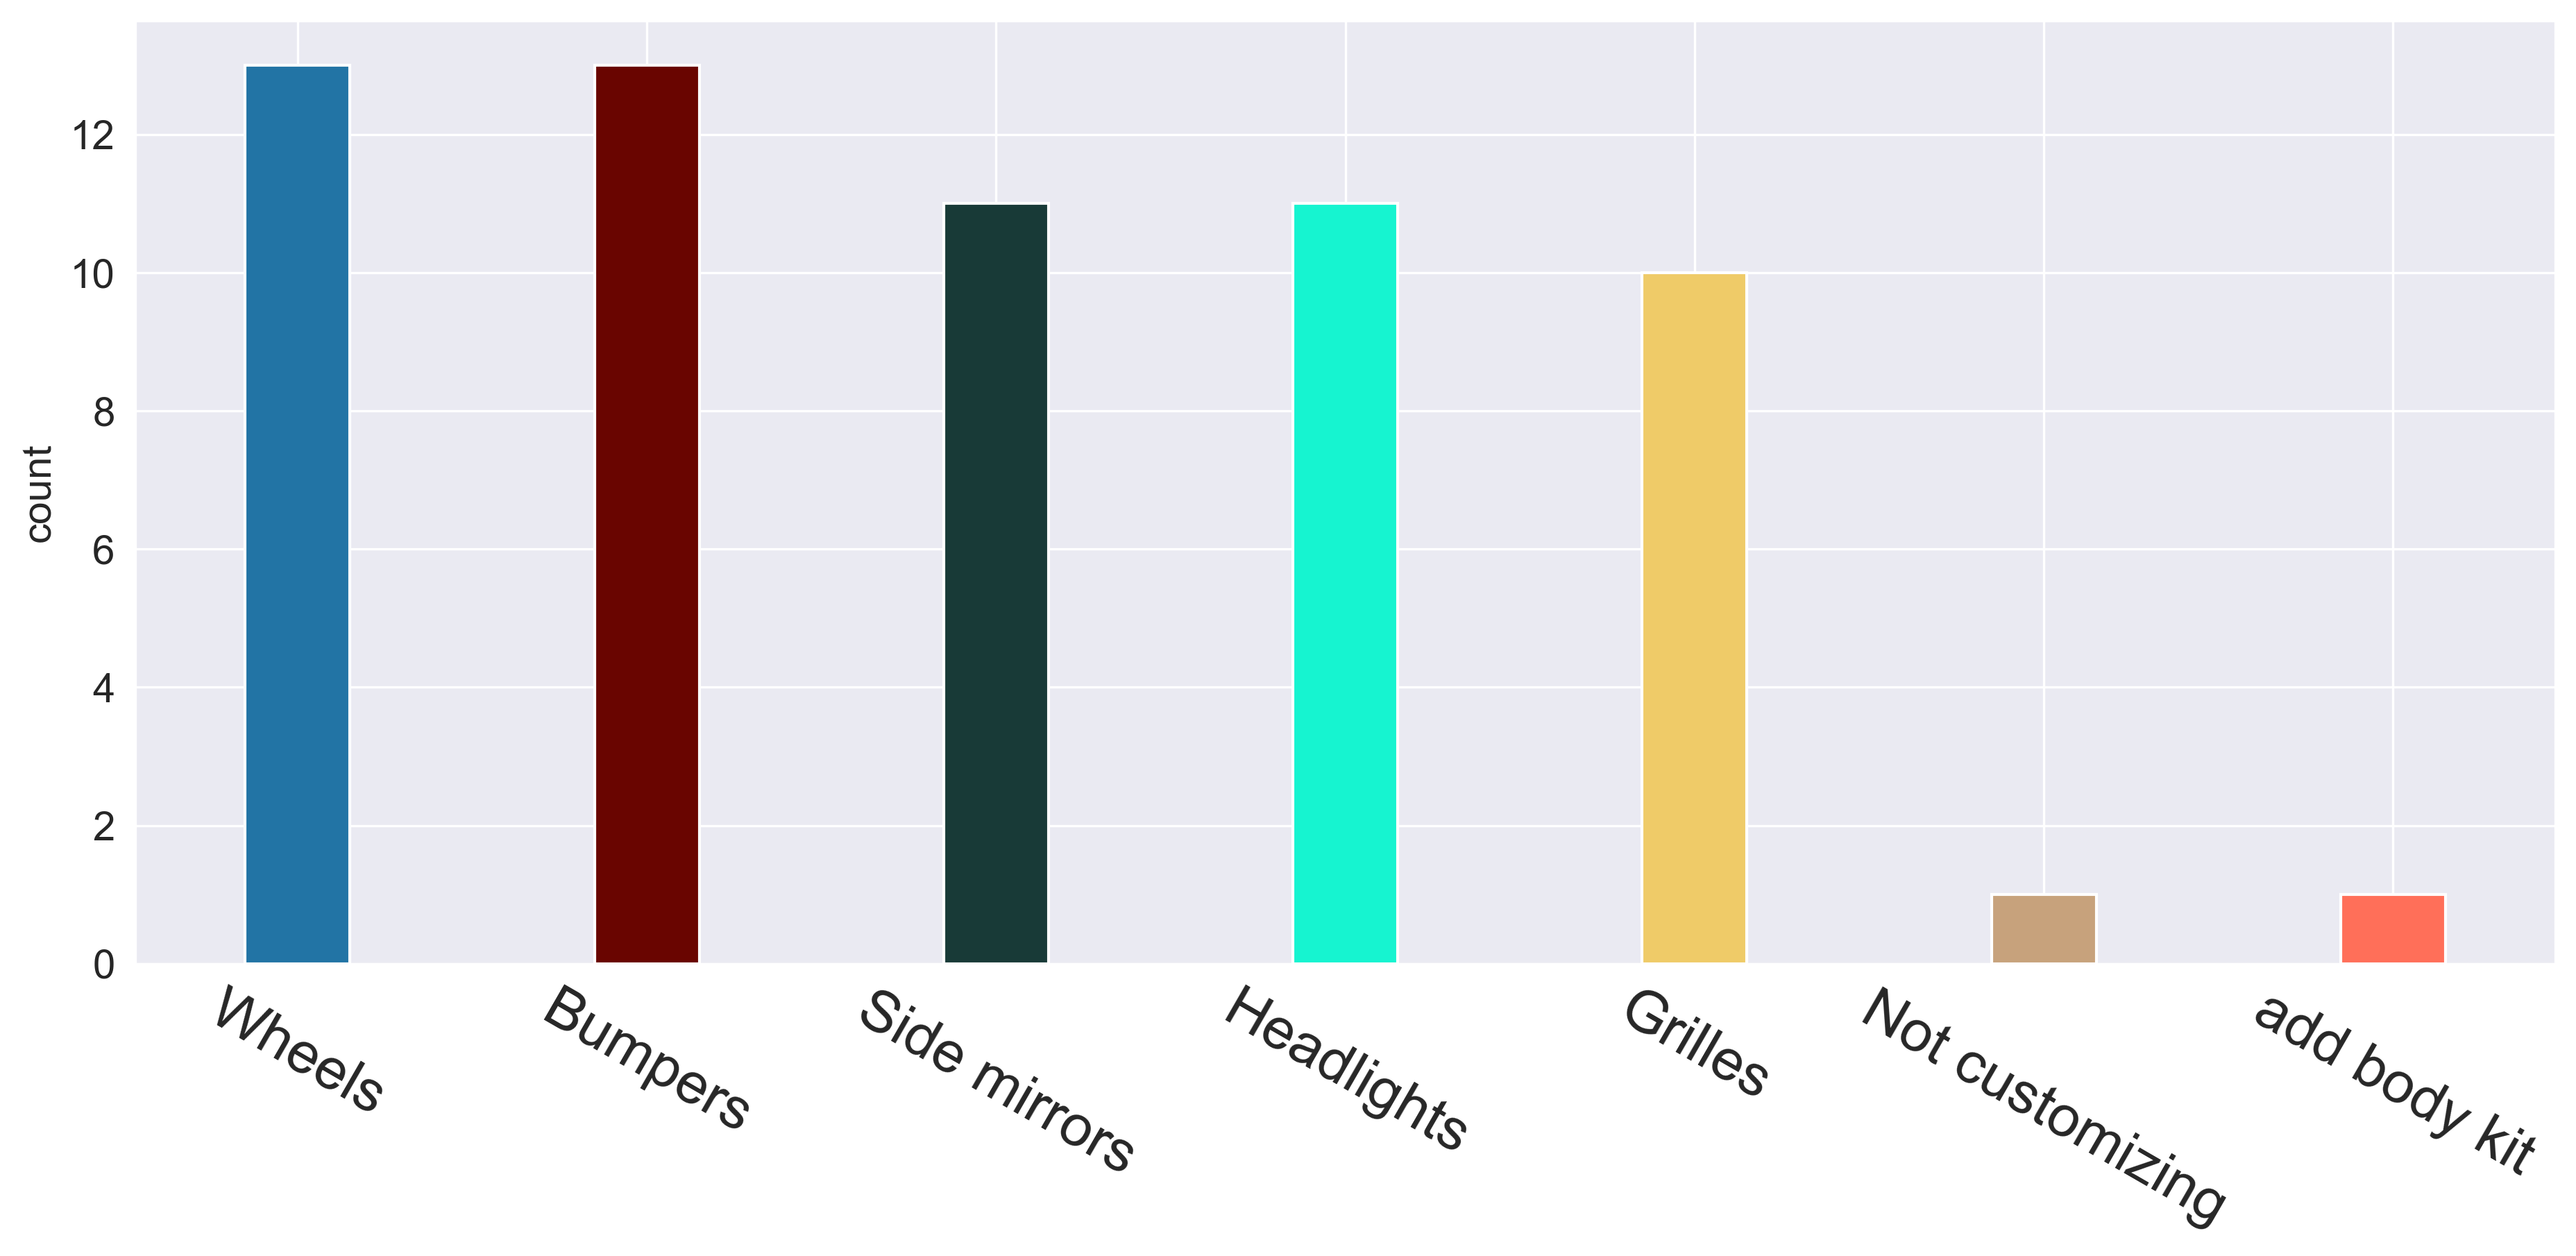

In [44]:
exterior_keys = [key[0] for key in Counter(exterior_components).most_common()]
exterior_values = [value[1] for value in Counter(exterior_components).most_common()]
exterior_keys[-1] = 'add body kit'
plt.figure(figsize=(15, 6), dpi=300)
plt.bar(exterior_keys,exterior_values, width = 0.3,
        color = ['#2274a5', '#690500', '#183A37', '#16F4D0', '#EFCB68', '#C7A27C', '#FF6F59']
       )
plt.xticks(rotation = -30, fontsize = 20)
plt.yticks(fontsize = 14)
# plt.xlabel("exterior_components", fontsize = 14)
plt.ylabel("count", fontsize = 14)

# color = ['#2274a5', '#690500', '#183A37', '#16F4D0', '#EFCB68', '#C7A27C', '#FF6F59', '#93A3BC']

Text(0, 0.5, 'count')

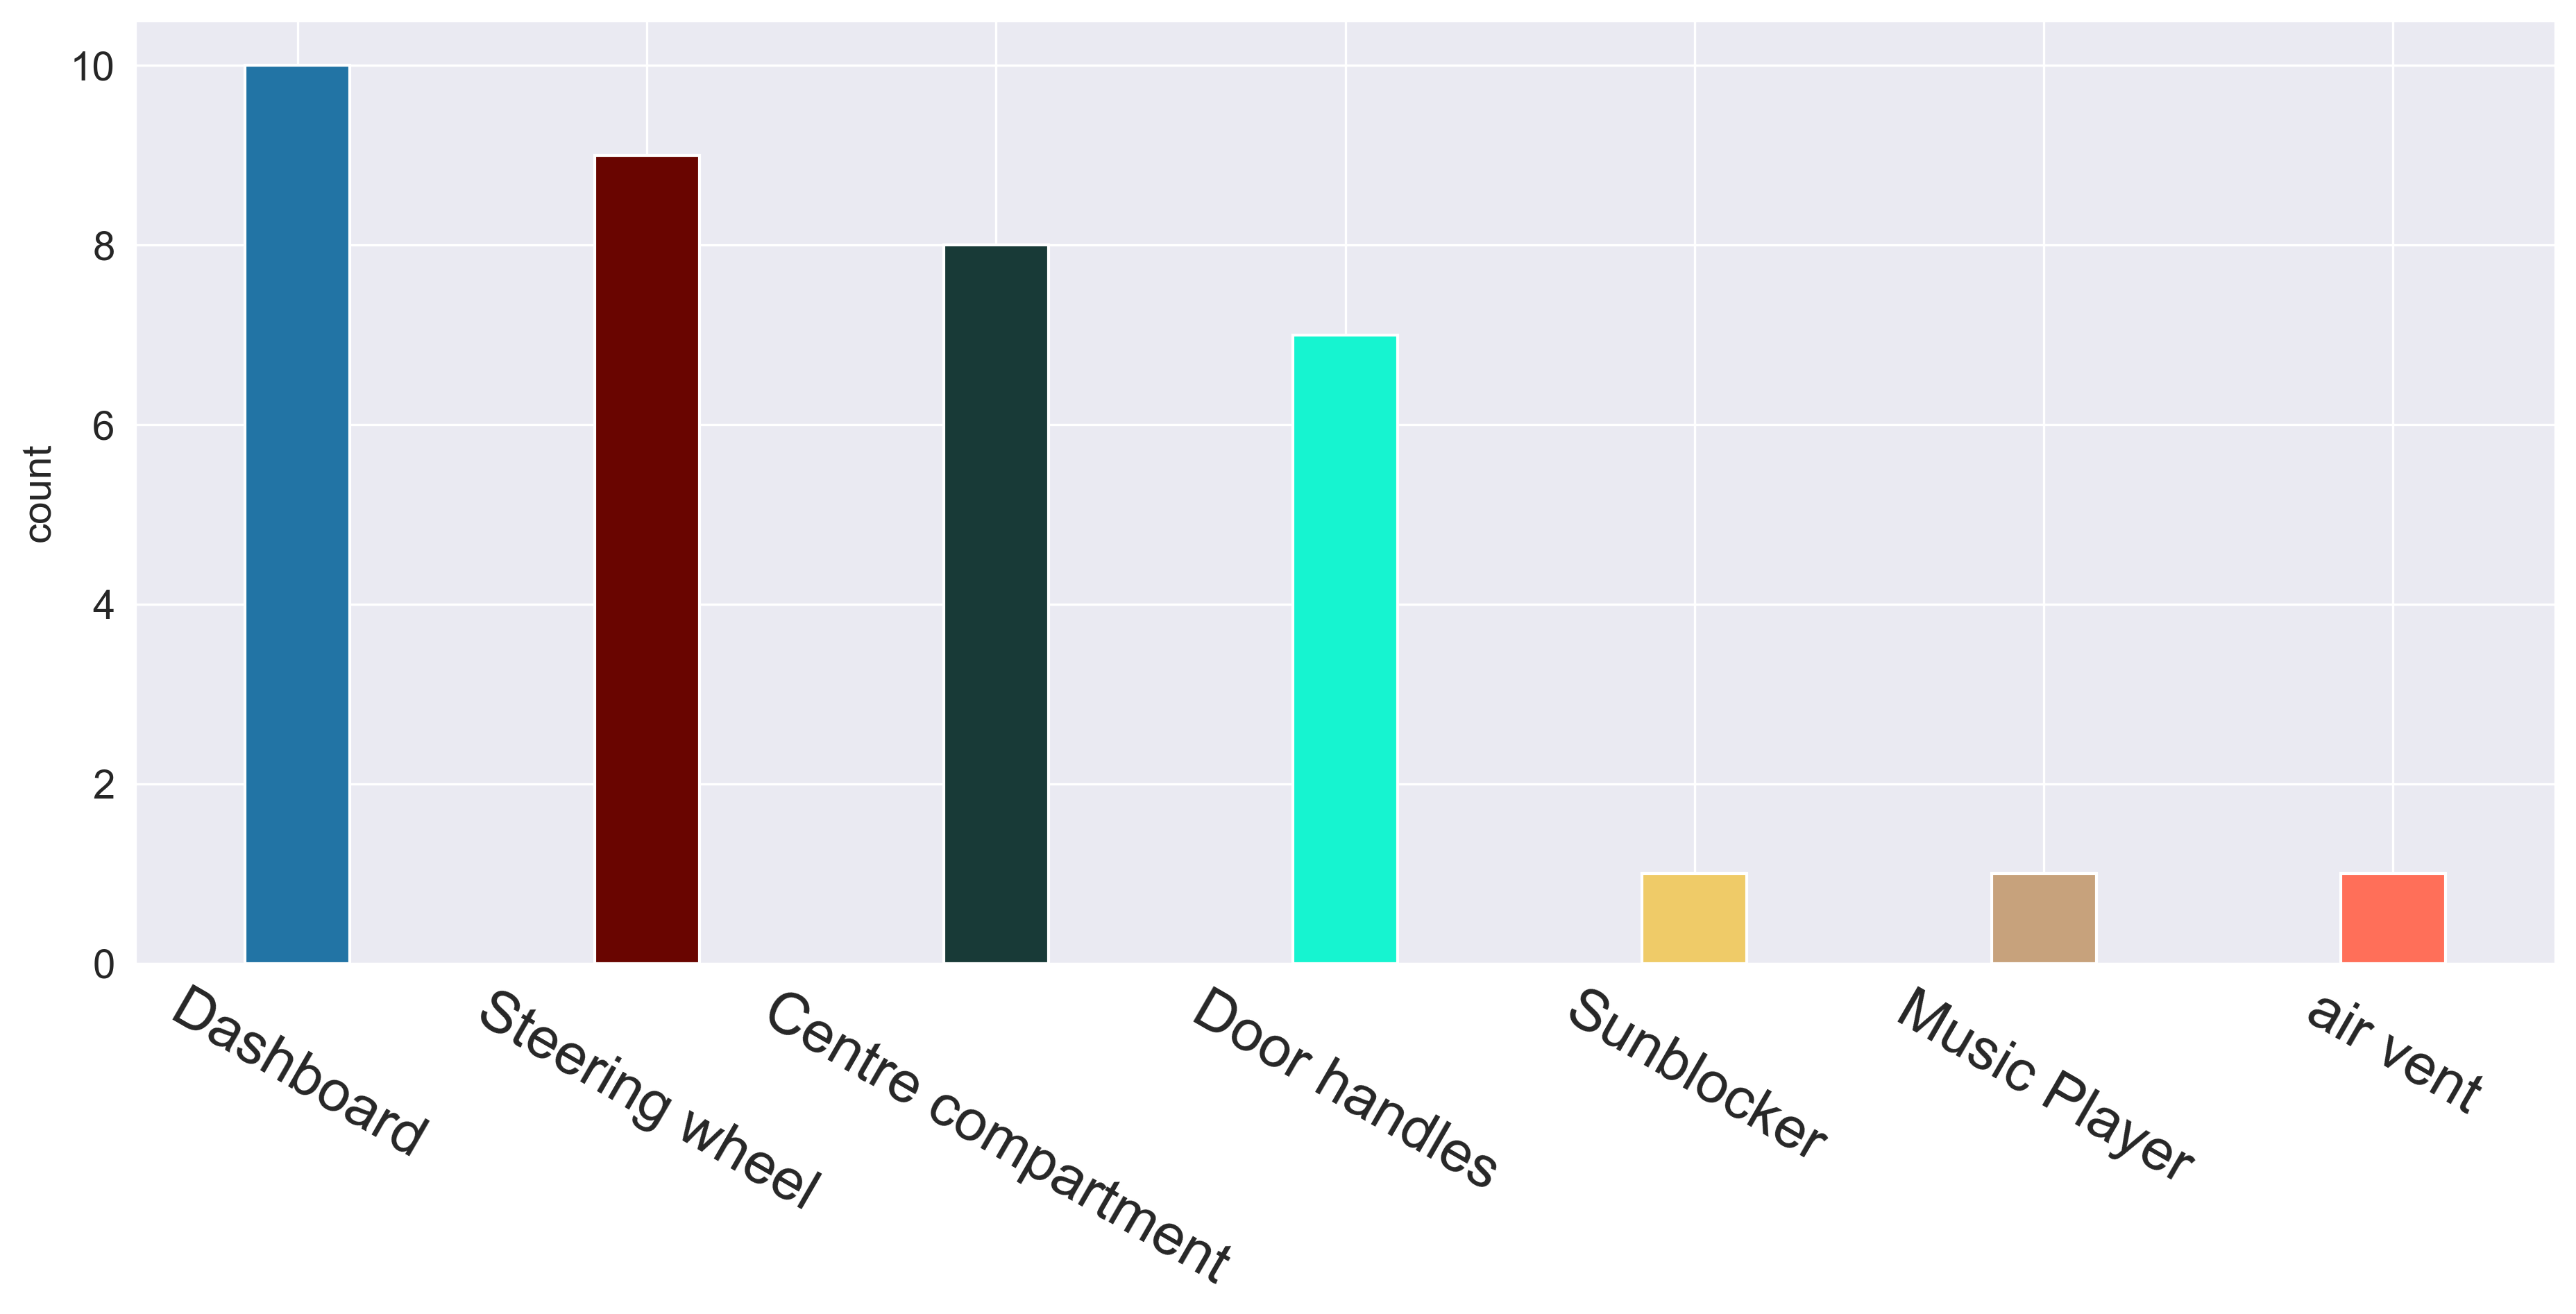

In [45]:
interior_keys = [key[0] for key in Counter(interior_components).most_common()]
interior_values = [value[1] for value in Counter(interior_components).most_common()]
interior_keys[4] = 'Sunblocker'
interior_keys[5] = 'Music Player'
plt.figure(figsize=(15, 6), dpi=300)
plt.bar(interior_keys,interior_values,width = 0.3,
        color = ['#2274a5', '#690500', '#183A37', '#16F4D0', '#EFCB68', '#C7A27C', '#FF6F59']
       )
plt.xticks(rotation = -30, fontsize = 20)
plt.yticks(fontsize = 14)
# plt.xlabel("exterior_components", fontsize = 14)
plt.ylabel("count", fontsize = 14)
# color = ['#2274a5', '#690500', '#183A37', '#16F4D0', '#EFCB68', '#C7A27C', '#FF6F59', '#93A3BC']

### Encoding Data
* Nominal Encoding (Rank does not matter)
    * One-hot encoding technique

In [46]:
print('features', 'unique_values'.rjust(50,' '))
print('-'*60)
print(renamed_df.apply(lambda col: len(col.unique())))

features                                      unique_values
------------------------------------------------------------
age_group                                        4
gender                                           2
car_ownership_history                            3
marital_status                                   3
car_purchase_factors                            37
customize_vehicle_likelihood_no_extra_charge     3
desired_exterior_component_customization        23
desired_interior_component_customization        16
customization_surcharge_tolerance                4
design_own_component_likelihood                  3
personalized_design_surcharge_tolerance          4
require_designer                                 3
dtype: int64


##### car_purchase_factors | exterior_components | interior_components have high number of unique values
* permutations of same factors
* Can perform association mining with these features

##### Example Pipeline:
* Given:
    * age_group
    * gender
    * car_ownership_history
    * marital status
* Association Factors:
    * customize_vehicle_likelihood_no_extra_charge
    * desired_exterior_component_customization
    * desired_interior_component_customization
    * design_own_component_likelihood
* Sub association:
    * require_designer

### Encoding features with low unique values first

In [47]:
renamed_df.columns

Index(['age_group', 'gender', 'car_ownership_history', 'marital_status',
       'car_purchase_factors', 'customize_vehicle_likelihood_no_extra_charge',
       'desired_exterior_component_customization',
       'desired_interior_component_customization',
       'customization_surcharge_tolerance', 'design_own_component_likelihood',
       'personalized_design_surcharge_tolerance', 'require_designer'],
      dtype='object')

In [48]:
# Convert int values in certain columns to strings for One Hot Encoding
renamed_df = renamed_df.astype({'customization_surcharge_tolerance' : 'string',
                               'personalized_design_surcharge_tolerance' : 'string',
                               'require_designer' : 'string'})

renamed_df = renamed_df.astype({'customization_surcharge_tolerance' : 'category',
                               'personalized_design_surcharge_tolerance' : 'category',
                               'require_designer' : 'category'})

In [49]:
oheObj = OneHotEncoder()

cat_cols = ['age_group', 'gender', 'car_ownership_history', 'marital_status',
       'customize_vehicle_likelihood_no_extra_charge',
       'customization_surcharge_tolerance', 'design_own_component_likelihood',
       'personalized_design_surcharge_tolerance', 'require_designer']

feature_arr = oheObj.fit_transform(renamed_df[cat_cols]).toarray()
feature_arr = feature_arr.astype('float32')

In [50]:
feature_arr.shape
print(feature_arr.dtype)
print(feature_arr)

float32
[[1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]]


In [51]:
oheObj.categories_

[array(['20-30', '31-40', '41-50', '51-60'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Do not own a car, but planning to purchase in future',
        'Own a car', 'Own more than one car'], dtype=object),
 array(['Married with children', 'Married with no children', 'Single'],
       dtype=object),
 array(['Likely', 'Not likely', 'Very likely'], dtype=object),
 array(['0', '500-1000', 'over 1000', 'under 500'], dtype=object),
 array(['No', 'Only with professional help', 'Yes'], dtype=object),
 array(['0', '500-1000', 'over 1000', 'under 500'], dtype=object),
 array(['No, I would need a designer to model my sketch', 'Not Designing',
        'Yes, I can design on my own'], dtype=object)]

In [52]:
feature_labels = oheObj.get_feature_names_out(cat_cols)
feature_labels

array(['age_group_20-30', 'age_group_31-40', 'age_group_41-50',
       'age_group_51-60', 'gender_Female', 'gender_Male',
       'car_ownership_history_Do not own a car, but planning to purchase in future',
       'car_ownership_history_Own a car',
       'car_ownership_history_Own more than one car',
       'marital_status_Married with children',
       'marital_status_Married with no children', 'marital_status_Single',
       'customize_vehicle_likelihood_no_extra_charge_Likely',
       'customize_vehicle_likelihood_no_extra_charge_Not likely',
       'customize_vehicle_likelihood_no_extra_charge_Very likely',
       'customization_surcharge_tolerance_0',
       'customization_surcharge_tolerance_500-1000',
       'customization_surcharge_tolerance_over 1000',
       'customization_surcharge_tolerance_under 500',
       'design_own_component_likelihood_No',
       'design_own_component_likelihood_Only with professional help',
       'design_own_component_likelihood_Yes',
       'pers

In [53]:
feature_encoded_df = pd.DataFrame(feature_arr, columns = feature_labels)
feature_encoded_df.index += 1
feature_encoded_df.head()


,age_group_20-30,age_group_31-40,age_group_41-50,age_group_51-60,gender_Female,gender_Male,"car_ownership_history_Do not own a car, but planning to purchase in future",car_ownership_history_Own a car,car_ownership_history_Own more than one car,marital_status_Married with children,...,design_own_component_likelihood_No,design_own_component_likelihood_Only with professional help,design_own_component_likelihood_Yes,personalized_design_surcharge_tolerance_0,personalized_design_surcharge_tolerance_500-1000,personalized_design_surcharge_tolerance_over 1000,personalized_design_surcharge_tolerance_under 500,"require_designer_No, I would need a designer to model my sketch",require_designer_Not Designing,"require_designer_Yes, I can design on my own"
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [54]:
feature_encoded_df.shape

(50, 29)

##### Number of columns increased to 29 columns, representing 29 unique categories from the previous 9 categories specified.

### Handling 3 columns with permutations of unique values
* car_purchase_factors
* desired_exterior_component_customization
* desired_interior_component_customization

In [55]:
unique_purchase_factors = set()
unique_exterior_components = set()
unique_interior_components = set()

for idx, row in renamed_df.iterrows():
    for factor in row['car_purchase_factors'].split(';'):
        unique_purchase_factors.add(factor)
    
    try:
        for exterior_component in row['desired_exterior_component_customization'].split(';'):
            unique_exterior_components.add(exterior_component)
    except AttributeError:
        unique_exterior_components.add(row['desired_exterior_component_customization'])
        
    try:
        for interior_component in row['desired_interior_component_customization'].split(';'):
            unique_interior_components.add(interior_component)
    except AttributeError:
        unique_interior_components.add(row['desired_interior_component_customization'])
        
print(unique_purchase_factors)
print()
print(len(unique_purchase_factors))
print()

print(unique_exterior_components)
print()
print(len(unique_exterior_components))
print()

print(unique_interior_components)
print()
print(len(unique_interior_components))

{'Price', 'Brand name', 'Technological features', 'Aesthetics', 'Functionality', 'Sustainability/environment considerations', 'Size', 'Customisable options'}

8

{'Headlights', 'Not customizing', 'add body kit and change the exhaust and tune the engine', 'Side mirrors', 'Wheels', 'Grilles', 'Bumpers'}

7

{'Steering wheel', 'Dashboard', 'Music Player and sound systems', 'Centre compartment', 'Door handles', 'Sun blocker for front passengers', 'air vent'}

7


In [56]:
renamed_df.head(1)

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,Not Designing


In [57]:
for idx, row in renamed_df.iterrows():
    renamed_df.at[idx,'car_purchase_factors'] = row['car_purchase_factors'].split(';')
    renamed_df.at[idx, 'desired_exterior_component_customization'] = row['desired_exterior_component_customization'].split(';')
    renamed_df.at[idx, 'desired_interior_component_customization'] = row['desired_interior_component_customization'].split(';')
    

In [58]:
renamed_df.head(1)

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Technological features, Functionality]",Very likely,"[Wheels, Grilles]","[Steering wheel, Dashboard]",500-1000,No,500-1000,Not Designing


* Only 8 unique car_purchase_factors, can encode with A - H and perform association mining
* 7 unique exterior & interior components

In [59]:
mlbObj = MultiLabelBinarizer()
mlb_cols = ['desired_exterior_component_customization', 'desired_interior_component_customization']

multi_encoded_df = pd.DataFrame(
    mlbObj.fit_transform(renamed_df['car_purchase_factors']),
    columns = mlbObj.classes_,
    index = renamed_df['car_purchase_factors'].index
)

for col in mlb_cols:
    multi_encoded_df = multi_encoded_df.join(
        pd.DataFrame(
            mlbObj.fit_transform(renamed_df[col]),
            columns = mlbObj.classes_,
            index = renamed_df[col].index
        )
    )

In [60]:
new_encoded_cols = list(multi_encoded_df.columns)

In [61]:
for col in new_encoded_cols:
    multi_encoded_df[col] = multi_encoded_df[col].astype('float32')

In [62]:
multi_encoded_df

,Aesthetics,Brand name,Customisable options,Functionality,Price,Size,Sustainability/environment considerations,Technological features,Bumpers,Grilles,...,Side mirrors,Wheels,add body kit and change the exhaust and tune the engine,Centre compartment,Dashboard,Door handles,Music Player and sound systems,Steering wheel,Sun blocker for front passengers,air vent
No.,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Combining feature_encoded_df & multi_encoded_df

In [63]:
feature_encoded_df.head(2)

,age_group_20-30,age_group_31-40,age_group_41-50,age_group_51-60,gender_Female,gender_Male,"car_ownership_history_Do not own a car, but planning to purchase in future",car_ownership_history_Own a car,car_ownership_history_Own more than one car,marital_status_Married with children,...,design_own_component_likelihood_No,design_own_component_likelihood_Only with professional help,design_own_component_likelihood_Yes,personalized_design_surcharge_tolerance_0,personalized_design_surcharge_tolerance_500-1000,personalized_design_surcharge_tolerance_over 1000,personalized_design_surcharge_tolerance_under 500,"require_designer_No, I would need a designer to model my sketch",require_designer_Not Designing,"require_designer_Yes, I can design on my own"
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [64]:
multi_encoded_df.head(2)

,Aesthetics,Brand name,Customisable options,Functionality,Price,Size,Sustainability/environment considerations,Technological features,Bumpers,Grilles,...,Side mirrors,Wheels,add body kit and change the exhaust and tune the engine,Centre compartment,Dashboard,Door handles,Music Player and sound systems,Steering wheel,Sun blocker for front passengers,air vent
No.,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [65]:
final_encoded_df = pd.concat([feature_encoded_df, multi_encoded_df], axis = 1)

In [66]:
final_encoded_df.head()

,age_group_20-30,age_group_31-40,age_group_41-50,age_group_51-60,gender_Female,gender_Male,"car_ownership_history_Do not own a car, but planning to purchase in future",car_ownership_history_Own a car,car_ownership_history_Own more than one car,marital_status_Married with children,...,Side mirrors,Wheels,add body kit and change the exhaust and tune the engine,Centre compartment,Dashboard,Door handles,Music Player and sound systems,Steering wheel,Sun blocker for front passengers,air vent
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [67]:
renamed_df

,age_group,gender,car_ownership_history,marital_status,car_purchase_factors,customize_vehicle_likelihood_no_extra_charge,desired_exterior_component_customization,desired_interior_component_customization,customization_surcharge_tolerance,design_own_component_likelihood,personalized_design_surcharge_tolerance,require_designer
No.,,,,,,,,,,,,
1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Technological features, Functionality]",Very likely,"[Wheels, Grilles]","[Steering wheel, Dashboard]",500-1000,No,500-1000,Not Designing
2,51-60,Female,Own a car,Married with children,"[Price, Brand name, Functionality]",Very likely,[Grilles],"[Centre compartment, Dashboard, Sun blocker fo...",under 500,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
3,20-30,Male,Own a car,Single,"[Price, Brand name, Aesthetics, Functionality,...",Very likely,[Not customizing],"[Steering wheel, Centre compartment, Door hand...",0,Only with professional help,0,"No, I would need a designer to model my sketch"
4,20-30,Male,Own a car,Single,"[Price, Brand name, Aesthetics, Technological ...",Very likely,[Not customizing],"[Steering wheel, Centre compartment, Dashboard]",under 500,No,under 500,Not Designing
5,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,"[Price, Aesthetics, Technological features, Fu...",Likely,[Wheels],"[Centre compartment, Dashboard]",under 500,Only with professional help,500-1000,"No, I would need a designer to model my sketch"
6,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Functionality]",Very likely,"[Wheels, Side mirrors, Bumpers]","[Steering wheel, Centre compartment, Door hand...",under 500,Yes,under 500,"Yes, I can design on my own"
7,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,"[Price, Brand name, Aesthetics, Technological ...",Very likely,"[Side mirrors, Bumpers]","[Door handles, Dashboard]",under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch"
8,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,"[Price, Functionality, Size, Sustainability/en...",Very likely,"[Wheels, Headlights, Side mirrors, Bumpers]","[Centre compartment, Door handles, Dashboard]",under 500,Only with professional help,over 1000,"No, I would need a designer to model my sketch"
9,31-40,Male,Own more than one car,Married with children,[Price],Not likely,[Bumpers],[Dashboard],0,No,over 1000,Not Designing


### Associative Rule Mining

#### Market Basket Analysis
* Association between items
* Bread -> 60% likelihood with Jam
* Wants to find product with association for product suggestion / placement


##### Possible Association
* Aged 20-30 Then exterior component / interior component / customize vehicle / design_own_component

* if-then relationship
    * if aged 20-30 then customize vehicle
    * if : antecedent
    * then : consequent
    * A => B
    * Right placement = earn money
* Above rules
    * single cardinality
    * multi cardinality
    
    
#### Measure Association
* 3 metrics to assist in measuring association
    * Support
        * Frequency of items
        * Filter out items that appears less frequently
        * frequency / total occurrence
    * Confidence
        * How often items occur together
        * Removes anomaly group
    * Lift
        * Strength of any rule (weight)
        * Support / Support(A) * Support(B)
        * 

### Apriori Algorithm
* Uses frequent item sets to generate association rule
* subset of a frequent item set must also be a frequent itemset
* Eliminates many unfrequent itemsets which reduces the number of rules drastically


##### Frequent Itemset
* Support value greater than threshold value
* Threshold value specified by user / domain expert

In [68]:
from mlxtend.frequent_patterns import apriori, association_rules


In [69]:
def convert(x):
    if x <= 0.0:
        return 0
    if x >= 1:
        return 1
final_encoded_df = final_encoded_df.applymap(convert)
final_encoded_df

,age_group_20-30,age_group_31-40,age_group_41-50,age_group_51-60,gender_Female,gender_Male,"car_ownership_history_Do not own a car, but planning to purchase in future",car_ownership_history_Own a car,car_ownership_history_Own more than one car,marital_status_Married with children,...,Side mirrors,Wheels,add body kit and change the exhaust and tune the engine,Centre compartment,Dashboard,Door handles,Music Player and sound systems,Steering wheel,Sun blocker for front passengers,air vent
1,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,0,0,1,1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,1,1,0,1,0,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
5,1,0,0,0,1,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,0
6,1,0,0,0,1,0,1,0,0,0,...,1,1,0,1,1,1,0,1,0,0
7,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
8,1,0,0,0,0,1,1,0,0,0,...,1,1,0,1,1,1,0,0,0,0
9,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
10,0,0,0,1,0,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0


In [82]:
final_encoded_df.columns

Index(['age_group_20-30', 'age_group_31-40', 'age_group_41-50',
       'age_group_51-60', 'gender_Female', 'gender_Male',
       'car_ownership_history_Do not own a car, but planning to purchase in future',
       'car_ownership_history_Own a car',
       'car_ownership_history_Own more than one car',
       'marital_status_Married with children',
       'marital_status_Married with no children', 'marital_status_Single',
       'customize_vehicle_likelihood_no_extra_charge_Likely',
       'customize_vehicle_likelihood_no_extra_charge_Not likely',
       'customize_vehicle_likelihood_no_extra_charge_Very likely',
       'customization_surcharge_tolerance_0',
       'customization_surcharge_tolerance_500-1000',
       'customization_surcharge_tolerance_over 1000',
       'customization_surcharge_tolerance_under 500',
       'design_own_component_likelihood_No',
       'design_own_component_likelihood_Only with professional help',
       'design_own_component_likelihood_Yes',
       'pers

In [118]:
age_groups = list(final_encoded_df.columns)[:3]
genders = list(final_encoded_df.columns)[4:6]
car_ownerships = list(final_encoded_df.columns)[6:9]
marital_status = list(final_encoded_df.columns)[9:12]
customize_veh_likelihood =  list(final_encoded_df.columns)[12:15]
customize_surcharge_tolerance =  list(final_encoded_df.columns)[15:19]
design_own_component_likelihood = list(final_encoded_df.columns)[19:22]
personalized_design_surcharge_tolerance = list(final_encoded_df.columns)[22:26]
require_designer = list(final_encoded_df.columns)[26:29]
purchase_factors = list(final_encoded_df.columns)[29:37]
exterior_components = list(final_encoded_df.columns)[37:44]
interior_components = list(final_encoded_df.columns)[44:]

In [459]:
dataset1 = pd.concat(
    (
        final_encoded_df[age_groups],
        final_encoded_df[marital_status],
        final_encoded_df[genders],
        final_encoded_df[exterior_components]
    ),
    axis = 1)

dataset2 = pd.concat(
    (
        final_encoded_df[age_groups],
        final_encoded_df[marital_status],
        final_encoded_df[genders],
        final_encoded_df[interior_components]
    ),
    axis = 1)

dataset3 = pd.concat(
    (
        final_encoded_df[age_groups],
        final_encoded_df[interior_components],
        final_encoded_df[exterior_components]
    ),
    axis = 1)

In [461]:
print('Dataset 1')
for i in np.arange(0.1, 1.0, 0.1):
    frequent_itemsets = apriori(dataset1, min_support = i.round(2), use_colnames = True)
    print('support: ',i.round(2),'| Unique Itemsets: ',frequent_itemsets.shape[0])
    
print()

print('Dataset 2')
for i in np.arange(0.1, 1.0, 0.1):
    frequent_itemsets = apriori(dataset2, min_support = i.round(2), use_colnames = True)
    print('support: ',i.round(2),'| Unique Itemsets: ',frequent_itemsets.shape[0])
    
print()

print('Dataset 3')
for i in np.arange(0.1, 1.0, 0.1):
    frequent_itemsets = apriori(dataset3, min_support = i.round(2), use_colnames = True)
    print('support: ',i.round(2),'| Unique Itemsets: ',frequent_itemsets.shape[0])

Dataset 1
support:  0.1 | Unique Itemsets:  143
support:  0.2 | Unique Itemsets:  55
support:  0.3 | Unique Itemsets:  27
support:  0.4 | Unique Itemsets:  14
support:  0.5 | Unique Itemsets:  7
support:  0.6 | Unique Itemsets:  5
support:  0.7 | Unique Itemsets:  3
support:  0.8 | Unique Itemsets:  0
support:  0.9 | Unique Itemsets:  0

Dataset 2
support:  0.1 | Unique Itemsets:  159
support:  0.2 | Unique Itemsets:  83
support:  0.3 | Unique Itemsets:  43
support:  0.4 | Unique Itemsets:  22
support:  0.5 | Unique Itemsets:  11
support:  0.6 | Unique Itemsets:  8
support:  0.7 | Unique Itemsets:  4
support:  0.8 | Unique Itemsets:  1
support:  0.9 | Unique Itemsets:  0

Dataset 3
support:  0.1 | Unique Itemsets:  277
support:  0.2 | Unique Itemsets:  73
support:  0.3 | Unique Itemsets:  32
support:  0.4 | Unique Itemsets:  14
support:  0.5 | Unique Itemsets:  6
support:  0.6 | Unique Itemsets:  4
support:  0.7 | Unique Itemsets:  2
support:  0.8 | Unique Itemsets:  1
support:  0.9 | 

In [552]:
frequent_itemsets_1 = apriori(dataset1, min_support = 0.1, use_colnames = True)
frequent_itemsets_1

frequent_itemsets_2 = apriori(dataset2, min_support = 0.1, use_colnames = True)
frequent_itemsets_2

frequent_itemsets_3 = apriori(dataset3, min_support = 0.05, use_colnames = True)
frequent_itemsets_3.shape

(560, 2)

In [553]:
rules_1 = association_rules(frequent_itemsets_1, metric = 'lift', min_threshold = 1.5)
# rules_1[rules_1['confidence'] > 0.8]
rules_2 = association_rules(frequent_itemsets_2, metric = 'lift', min_threshold = 1.5)
# rules_2[rules_2.confidence>=0.5].reset_index(drop = True)
rules_3 = association_rules(frequent_itemsets_3, metric = 'lift', min_threshold = 1)

In [554]:
rules_3.shape

(8820, 9)

In [555]:
rules_3[rules_3.confidence>=0.3].shape

(5693, 9)

### Exterior Component Association

In [434]:
female_consequents = list()
male_consequents = list()

female_confidence = list()
male_confidence = list()

for idx, row in rules_1[rules_1.confidence>=0.3].reset_index(drop = True).iterrows():
    if 'gender_Female' in list(row['antecedents']):
        for item in list(row['consequents']):
            female_consequents.append(item)
        female_confidence.append([list(row['consequents']), row['confidence']])
        
    elif 'gender_Male' in list(row['antecedents']):
        male_confidence.append([list(row['consequents']), row['confidence']])
        for item in list(row['consequents']):
            male_consequents.append(item)

updated_female_consequents = {k:v for k,v in Counter(female_consequents).items() if k in exterior_components}
updated_male_consequents = {k:v for k,v in Counter(male_consequents).items() if k in exterior_components}

female_side_mirrors_conf = 0
female_wheels_conf = 0

male_headlight_conf = 0
male_bumpers_conf = 0
male_wheels_conf = 0
male_side_mirrors_conf = 0

for i in male_confidence:
    if 'Headlights' in i[0]:
        male_headlight_conf += i[1]
    elif 'Bumpers' in i[0]:
        male_bumpers_conf += i[1]
    elif 'Wheels' in i[0]:
        male_wheels_conf += i[1]
    elif 'Side mirrors' in i[0]:
        male_side_mirrors_conf += i[1]

for i in female_confidence:
    if 'Side mirrors' in i[0]:
        female_side_mirrors_conf += i[1]
    elif 'Wheels' in i[0]:
        female_wheels_conf += i[1]
        
exterior_male_conf = list(updated_male_consequents.values())
exterior_female_conf = list(updated_female_consequents.values())

male_headlight_conf = round(male_headlight_conf/exterior_male_conf[0],2)
male_bumpers_conf = round(male_bumpers_conf/exterior_male_conf[1],2)
male_wheels_conf = round(male_wheels_conf/exterior_male_conf[2],2)
male_side_mirrors_conf = round(male_side_mirrors_conf/exterior_male_conf[3],2)

female_side_mirrors_conf = round(female_side_mirrors_conf/exterior_female_conf[0],2)
female_wheels_conf = round(female_wheels_conf/exterior_female_conf[1],2)

male_conf = [male_headlight_conf,male_bumpers_conf,male_wheels_conf,male_side_mirrors_conf]
female_conf = [female_side_mirrors_conf,female_wheels_conf]

female_table_1_idx = Counter(updated_female_consequents).keys()
female_table_1_values = Counter(updated_female_consequents).values()

male_table_1_idx = Counter(updated_male_consequents).keys()
male_table_1_values = Counter(updated_male_consequents).values()
print('Female Exterior Component Association')
print(tabulate(list(zip(female_table_1_idx,female_table_1_values,female_conf)),headers = ['Exterior Component','Count','Confidence'], tablefmt = 'fancy_grid'))
print('Male Exterior Component Association')
print(tabulate(list(zip(male_table_1_idx,male_table_1_values,male_conf)),headers = ['Exterior Component','Count','Confidence'], tablefmt = 'fancy_grid'))


Female Exterior Component Association
╒══════════════════════╤═════════╤══════════════╕
│ Exterior Component   │   Count │   Confidence │
╞══════════════════════╪═════════╪══════════════╡
│ Side mirrors         │       5 │         0.44 │
├──────────────────────┼─────────┼──────────────┤
│ Wheels               │       1 │         0    │
╘══════════════════════╧═════════╧══════════════╛
Male Exterior Component Association
╒══════════════════════╤═════════╤══════════════╕
│ Exterior Component   │   Count │   Confidence │
╞══════════════════════╪═════════╪══════════════╡
│ Headlights           │      36 │         0.64 │
├──────────────────────┼─────────┼──────────────┤
│ Wheels               │      14 │         0.27 │
├──────────────────────┼─────────┼──────────────┤
│ Bumpers              │      13 │         0.18 │
├──────────────────────┼─────────┼──────────────┤
│ Side mirrors         │       2 │         0.41 │
╘══════════════════════╧═════════╧══════════════╛


### Interior Component Association

In [457]:
rules_2[rules_2.confidence>=0.3].shape

(335, 9)

In [452]:
female_consequents_2 = list()
male_consequents_2 = list()

female_confidence_2 = list()
male_confidence_2 = list()

for idx, row in rules_2[rules_2.confidence>=0.3].reset_index(drop = True).iterrows():
    if 'gender_Female' in list(row['antecedents']):
        for item in list(row['consequents']):
            female_consequents_2.append(item)
        female_confidence_2.append([list(row['consequents']), row['confidence']])
        
    elif 'gender_Male' in list(row['antecedents']):
        male_confidence_2.append([list(row['consequents']), row['confidence']])
        for item in list(row['consequents']):
            male_consequents_2.append(item)

In [453]:
updated_female_consequents_2 = {k:v for k,v in Counter(female_consequents_2).items() if k in interior_components}
updated_male_consequents_2 = {k:v for k,v in Counter(male_consequents_2).items() if k in interior_components}


In [454]:
updated_male_consequents_2

{'Centre compartment': 56,
 'Steering wheel': 49,
 'Door handles': 26,
 'Dashboard': 33}

In [455]:
female_doorhandles_conf = 0

male_center_compart_conf = 0
male_steering_wheel_conf = 0
male_doorhandles_conf = 0
male_dashboard_mirrors_conf = 0

for i in male_confidence_2:
    if 'Centre compartment' in i[0]:
        male_center_compart_conf += i[1]
    elif 'Steering wheel' in i[0]:
        male_steering_wheel_conf += i[1]
    elif 'Door handles' in i[0]:
        male_doorhandles_conf += i[1]
    elif 'Dashboard' in i[0]:
        male_dashboard_mirrors_conf += i[1]

for i in female_confidence_2:
    if 'Door handles' in i[0]:
        female_doorhandles_conf += i[1]
        
exterior_male_conf_2 = list(updated_male_consequents_2.values())
exterior_female_conf_2 = list(updated_female_consequents_2.values())

male_center_compart_conf = round(male_center_compart_conf/exterior_male_conf_2[0],2)
male_steering_wheel_conf = round(male_steering_wheel_conf/exterior_male_conf_2[1],2)
male_doorhandles_conf = round(male_doorhandles_conf/exterior_male_conf_2[2],2)
male_dashboard_mirrors_conf = round(male_dashboard_mirrors_conf/exterior_male_conf_2[3],2)

female_doorhandles_conf = round(female_doorhandles_conf/exterior_female_conf_2[0],2)

male_conf_2 = [male_center_compart_conf,male_steering_wheel_conf,male_doorhandles_conf,male_dashboard_mirrors_conf]
female_conf_2 = [female_doorhandles_conf]

female_table_1_idx_2 = Counter(updated_female_consequents_2).keys()
female_table_1_values_2 = Counter(updated_female_consequents_2).values()

male_table_1_idx_2 = Counter(updated_male_consequents_2).keys()
male_table_1_values_2 = Counter(updated_male_consequents_2).values()
print('Female Interior Component Association')
print(tabulate(list(zip(female_table_1_idx_2,female_table_1_values_2,female_conf_2)),headers = ['Interior Component','Count','Confidence'], tablefmt = 'fancy_grid'))
print('Male Interior Component Association')
print(tabulate(list(zip(male_table_1_idx_2,male_table_1_values_2,male_conf_2)),headers = ['Interior Component','Count','Confidence'], tablefmt = 'fancy_grid'))

Female Interior Component Association
╒══════════════════════╤═════════╤══════════════╕
│ Interior Component   │   Count │   Confidence │
╞══════════════════════╪═════════╪══════════════╡
│ Door handles         │       8 │         0.58 │
╘══════════════════════╧═════════╧══════════════╛
Male Interior Component Association
╒══════════════════════╤═════════╤══════════════╕
│ Interior Component   │   Count │   Confidence │
╞══════════════════════╪═════════╪══════════════╡
│ Centre compartment   │      56 │         0.64 │
├──────────────────────┼─────────┼──────────────┤
│ Steering wheel       │      49 │         0.48 │
├──────────────────────┼─────────┼──────────────┤
│ Door handles         │      26 │         0.33 │
├──────────────────────┼─────────┼──────────────┤
│ Dashboard            │      33 │         0.03 │
╘══════════════════════╧═════════╧══════════════╛


In [458]:
# rules_1[rules_1['confidence'] > 0.8].reset_index(drop = True).iloc[[9,19,24]][['antecedents', 'consequents', 'confidence']]

# rules_2[rules_2['confidence'] > 0.5].reset_index(drop = True).iloc[[12,17]][['antecedents', 'consequents', 'confidence']]

# rules_2[rules_2['confidence'] > 0.5].reset_index(drop = True).iloc[[20,22,27]][['antecedents', 'consequents', 'confidence']]

### Age_Group Association

In [543]:
age_groups

['age_group_20-30', 'age_group_31-40', 'age_group_41-50']

In [677]:
age20_30_consequents = list()
age31_40_consequents = list()
age41_50_consequents = list()

age20_30_confidence = list()
age31_40_confidence = list()
age41_50_confidence = list()

for idx, row in rules_3[rules_3.confidence>=0.01].reset_index(drop = True).iterrows():
    if 'age_group_20-30' in list(row['antecedents']):
        for item in list(row['consequents']):
            age20_30_consequents.append(item)
        age20_30_confidence.append([list(row['consequents']), row['confidence']])
        
    elif 'age_group_31-40' in list(row['antecedents']):
        for item in list(row['consequents']):
            age31_40_consequents.append(item)
        age31_40_confidence.append([list(row['consequents']), row['confidence']])
                
    elif 'age_group_41-50' in list(row['antecedents']):
        for item in list(row['consequents']):
            age41_50_consequents.append(item)
        age41_50_confidence.append([list(row['consequents']), row['confidence']])

In [678]:
updated_20_30_consequents = {k:v for k,v in Counter(age20_30_consequents).items() if (k in interior_components or k in exterior_components)}
updated_31_40_consequents = {k:v for k,v in Counter(age31_40_consequents).items() if (k in interior_components or k in exterior_components)}
updated_41_50_consequents = {k:v for k,v in Counter(age41_50_consequents).items() if (k in interior_components or k in exterior_components)}

In [679]:
age20_30_Centre_compart_conf = 0
age20_30_door_conf = 0
age20_30_steering_conf = 0
age20_30_headlight_conf = 0
age20_30_sidemirror_conf = 0
age20_30_wheels_conf = 0
age20_30_bumpers_conf = 0
age20_30_dashboard_conf = 0
age20_30_grills_conf = 0

age31_40_dashboard_conf = 0
age31_40_grilles_conf = 0
age31_40_wheels_conf = 0

age41_50_steering_conf = 0
age41_50_bumpers_conf = 0
age41_50_headlight_conf = 0
age41_50_wheels_conf = 0
age41_50_dashboard_conf = 0


for i in age20_30_confidence:
    if 'Centre compartment' in i[0]:
        age20_30_Centre_compart_conf += i[1]
    if 'Door handles' in i[0]:
        age20_30_door_conf += i[1]
    if 'Steering wheel' in i[0]:
        age20_30_steering_conf += i[1]
    if 'Headlights' in i[0]:
        age20_30_headlight_conf += i[1]
    if 'Side mirrors' in i[0]:
        age20_30_sidemirror_conf += i[1]
    if 'Wheels' in i[0]:
        age20_30_wheels_conf += i[1]
    if 'Bumpers' in i[0]:
        age20_30_bumpers_conf += i[1]
    if 'Dashboard' in i[0]:
        age20_30_dashboard_conf += i[1]
    if 'Grilles' in i[0]:
        age20_30_grills_conf += i[1]

for i in age31_40_confidence:
    if 'Wheels' in i[0]:
        age31_40_wheels_conf += i[1]
    if 'Dashboard' in i[0]:
        age31_40_dashboard_conf += i[1]
    if 'Grilles' in i[0]:
        age31_40_grilles_conf += i[1]

for i in age41_50_confidence:
    if 'Steering wheel' in i[0]:
        age41_50_steering_conf += i[1]
    if 'Headlights' in i[0]:
        age41_50_headlight_conf += i[1]
    if 'Wheels' in i[0]:
        age41_50_wheels_conf += i[1]
    if 'Bumpers' in i[0]:
        age41_50_bumpers_conf += i[1]
    if 'Dashboard' in i[0]:
        age41_50_dashboard_conf += i[1]

age20_30_conf = list(updated_20_30_consequents.values())
age31_40_conf = list(updated_31_40_consequents.values())
age41_50_conf = list(updated_41_50_consequents.values())

age20_30_Centre_compart_conf  = round(age20_30_Centre_compart_conf/age20_30_conf[0],2)
age20_30_door_conf  = round(age20_30_door_conf/age20_30_conf[1],2)
age20_30_steering_conf  = round(age20_30_steering_conf/age20_30_conf[2],2)
age20_30_headlight_conf  = round(age20_30_headlight_conf/age20_30_conf[3],2)
age20_30_sidemirror_conf   = round(age20_30_sidemirror_conf/age20_30_conf[4],2)
age20_30_wheels_conf   = round(age20_30_wheels_conf/age20_30_conf[5],2)
age20_30_bumpers_conf   = round(age20_30_bumpers_conf/age20_30_conf[6],2)
age20_30_dashboard_conf    = round(age20_30_dashboard_conf/age20_30_conf[7],2)
age20_30_grills_conf   = round(age20_30_grills_conf/age20_30_conf[8],2)

age31_40_dashboard_conf   = round(age31_40_dashboard_conf/age31_40_conf[0],2)
age31_40_wheels_conf    = round(age31_40_wheels_conf/age31_40_conf[1],2)
age31_40_grilles_conf   = round(age31_40_grilles_conf/age31_40_conf[2],2)

age41_50_steering_conf  = round(age41_50_steering_conf/age41_50_conf[0],2)
age41_50_bumpers_conf   = round(age41_50_bumpers_conf/age41_50_conf[1],2)
age41_50_headlight_conf  = round(age41_50_headlight_conf/age41_50_conf[2],2)
age41_50_wheels_conf   = round(age41_50_wheels_conf/age41_50_conf[3],2)
age41_50_dashboard_conf    = round(age41_50_dashboard_conf/age41_50_conf[4],2)


age_2030_conf = [age20_30_Centre_compart_conf,age20_30_door_conf,age20_30_steering_conf,age20_30_headlight_conf,
                age20_30_sidemirror_conf,age20_30_wheels_conf,age20_30_bumpers_conf,age20_30_dashboard_conf,age20_30_grills_conf]

age_3140_conf = [age31_40_wheels_conf,age31_40_dashboard_conf,age31_40_grilles_conf]

age_4150_conf = [age41_50_steering_conf,age41_50_bumpers_conf,age41_50_headlight_conf,age41_50_wheels_conf,age41_50_dashboard_conf]


age2030_table_idx = Counter(updated_20_30_consequents).keys()
age2030_table_values = Counter(updated_20_30_consequents).values()

age3140_table_idx = Counter(updated_31_40_consequents).keys()
age3140_table_values = Counter(updated_31_40_consequents).values()

age4150_table_idx = Counter(updated_41_50_consequents).keys()
age4150_table_values = Counter(updated_41_50_consequents).values()

print('Age 20-30 Components')
print(tabulate(list(zip(age2030_table_idx,age2030_table_values,age_2030_conf)),headers = ['Interior Component','Count','Confidence'], tablefmt = 'fancy_grid'))
print('Age 31-40 Components')
print(tabulate(list(zip(age3140_table_idx,age3140_table_values,age_3140_conf)),headers = ['Interior Component','Count','Confidence'], tablefmt = 'fancy_grid'))
print('Age 41-50 Components')
print(tabulate(list(zip(age4150_table_idx,age4150_table_values,age_4150_conf)),headers = ['Interior Component','Count','Confidence'], tablefmt = 'fancy_grid'))

Age 20-30 Components
╒══════════════════════╤═════════╤══════════════╕
│ Interior Component   │   Count │   Confidence │
╞══════════════════════╪═════════╪══════════════╡
│ Centre compartment   │     364 │         0.35 │
├──────────────────────┼─────────┼──────────────┤
│ Door handles         │     415 │         0.36 │
├──────────────────────┼─────────┼──────────────┤
│ Steering wheel       │     352 │         0.39 │
├──────────────────────┼─────────┼──────────────┤
│ Headlights           │     268 │         0.33 │
├──────────────────────┼─────────┼──────────────┤
│ Side mirrors         │     415 │         0.32 │
├──────────────────────┼─────────┼──────────────┤
│ Wheels               │     416 │         0.35 │
├──────────────────────┼─────────┼──────────────┤
│ Bumpers              │     244 │         0.32 │
├──────────────────────┼─────────┼──────────────┤
│ Dashboard            │     409 │         0.44 │
├──────────────────────┼─────────┼──────────────┤
│ Grilles              │     